# Dark Matter Model Setup

In this notebook we detail how the differential cross-sections for the Scalar Singlet/Silveira-Zee dark matter model are used with GammaBayes with example implementations near the end.

## Extracting the branching fractions

In this section we detail how the differential cross-sections are converted into the `darkSUSY_BFs_cleaned.csv` file within the `GammaBayes` package. The `BranchingFactors.dat` file is not available through GitHub due to it being a relatively large file but if wanted can be acquired by emailing me, Liam Pinchbeck, at my email address `Liam.Pinchbeck@monash.edu`.

Let's first import the necessary functions and set the path to the file containing the `darkSUSY` differential cross-sections.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
from scipy import interpolate, integrate
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
package_dir = "../gammabayes"
branchingfractions_dtf = pd.read_csv(package_dir+'/BFCalc/darkSUSY_BFs/BranchingFactors.dat', delimiter='\t')


branchingfractions = np.squeeze(np.array(list(branchingfractions_dtf.iloc)))[1:]
branchingfractions[0]

'   10.000000000000000        1.0000000000000000E-008   0.0000000000000000        1.0378850333402099E-049   0.0000000000000000        4.4365241407128310E-045   0.0000000000000000        1.1961342122771007E-042   1.0731768960356098E-047   4.2927058455958292E-047   3.9703060050698629E-042   1.2648359410883449E-044   0.0000000000000000        1.8907702685825177E-041   0.0000000000000000        0.0000000000000000        0.0000000000000000        8.4828835412886704E-044   0.0000000000000000        0.0000000000000000        0.0000000000000000     '

Once extracted we convert the names of the particle outputs to a more usable form within the `variablesdict` object.

In [2]:
variables = [channel.strip() for channel in branchingfractions_dtf.columns[0].split(' | ')]
variablesdict = {idx:channel.replace(' + ','').replace('bar','').replace('anti-','') for idx, channel in enumerate(variables)}
darkSUSYchannel_list = list(variablesdict.values())

We then extract the numerical values of the differential cross-sections within a numpy file. This is done so that we can perform array operations, primarily `np.sum`, on the object to turn the differential cross-sections into annihilation ratios by dividing them by the total cross section defined as the sum of all the partial cross-sections.

In [3]:
splitBFs = [np.array(unsplitBF.split(' ')) for unsplitBF in branchingfractions]
splitBFs = np.array([splitBF[np.where(splitBF)] for splitBF in splitBFs]).astype(float)
splitBFs

array([[1.00000000e+01, 1.00000000e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.07922646e+01, 1.00000000e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16472974e+01, 1.00000000e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.58568270e+05, 1.07952481e+03, 0.00000000e+00, ...,
        9.17703938e-26, 0.00000000e+00, 0.00000000e+00],
       [9.26589591e+05, 1.07952481e+03, 0.00000000e+00, ...,
        7.87931269e-26, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+06, 1.07952481e+03, 0.00000000e+00, ...,
        6.76507373e-26, 0.00000000e+00, 0.00000000e+00]])

Let's now store all of this within a pandas dataframe and save it to the working directory.

In [14]:
df = pd.DataFrame(splitBFs, columns=list(variablesdict.values()))
df.to_csv('../gammabayes/BFCalc/darkSUSY_BFs/darkSUSY_BFs_cleaned.csv', index=False, header=True, sep=' ')

From here this is what one can do with files contained within the publically avaiable package.

In [5]:
df = pd.read_csv('darkSUSY_BFs_cleaned.csv', delimiter=' ')

Now that we've done all this let's have a look at the first few rows of the cleaned data.

In [6]:
df.head()

,mS [GeV],lahS,nuenue,e+e-,numunumu,mu+mu-,nutaunutau,tau+tau-,uu,dd,...,ss,tt,bb,gammagamma,W+W-,ZZ,gg,HH,Zgamma,hadrons (below confinement scale)
0,10.000000,1.000000e-08,0.0,1.037885e-49,0.0,4.436524e-45,0.0,1.196134e-42,1.073177e-47,4.292706e-47,...,1.264836e-44,0.0,1.890770e-41,0.000000e+00,0.000000e+00,0.000000e+00,8.482884e-44,0.0,0.0,0.0
1,10.792265,1.000000e-08,0.0,1.046890e-49,0.0,4.407819e-45,0.0,1.221221e-42,1.082488e-47,4.329951e-47,...,6.817516e-45,0.0,1.609609e-41,9.750127e-46,1.823328e-48,5.988314e-49,4.730270e-43,0.0,0.0,0.0
2,11.647297,1.000000e-08,0.0,1.057527e-49,0.0,4.450677e-45,0.0,1.240166e-42,1.093487e-47,4.373946e-47,...,6.737022e-45,0.0,1.625305e-41,1.146854e-45,2.924788e-48,9.584917e-49,4.295746e-43,0.0,0.0,0.0
3,12.570072,1.000000e-08,0.0,1.070122e-49,0.0,4.500950e-45,0.0,1.260514e-42,1.106510e-47,4.426039e-47,...,6.673289e-45,0.0,1.636777e-41,1.349072e-45,4.695867e-48,1.536033e-48,3.933667e-43,0.0,0.0,0.0
4,13.565954,1.000000e-08,0.0,1.085077e-49,0.0,4.562140e-45,0.0,1.282965e-42,1.121974e-47,4.487895e-47,...,6.624157e-45,0.0,1.646162e-41,1.589148e-45,7.591720e-48,2.478274e-48,3.653652e-43,0.0,0.0,0.0


One can see that the first two columns contain the mass [GeV] and Higgs Coupling values for the differential cross-sections for the channels shown in the following columns.

In [7]:
list(df.columns[2:])

['nuenue',
 'e+e-',
 'numunumu',
 'mu+mu-',
 'nutaunutau',
 'tau+tau-',
 'uu',
 'dd',
 'cc',
 'ss',
 'tt',
 'bb',
 'gammagamma',
 'W+W-',
 'ZZ',
 'gg',
 'HH',
 'Zgamma',
 'hadrons (below confinement scale)']

Let's plot all the branching fractions for these channels remembering that we've stored the differential cross-sections (difference of normalisation so doesn't matter when doing spectral analysis) so we need to divide by the sum of the differential cross-sections for all the final channels.

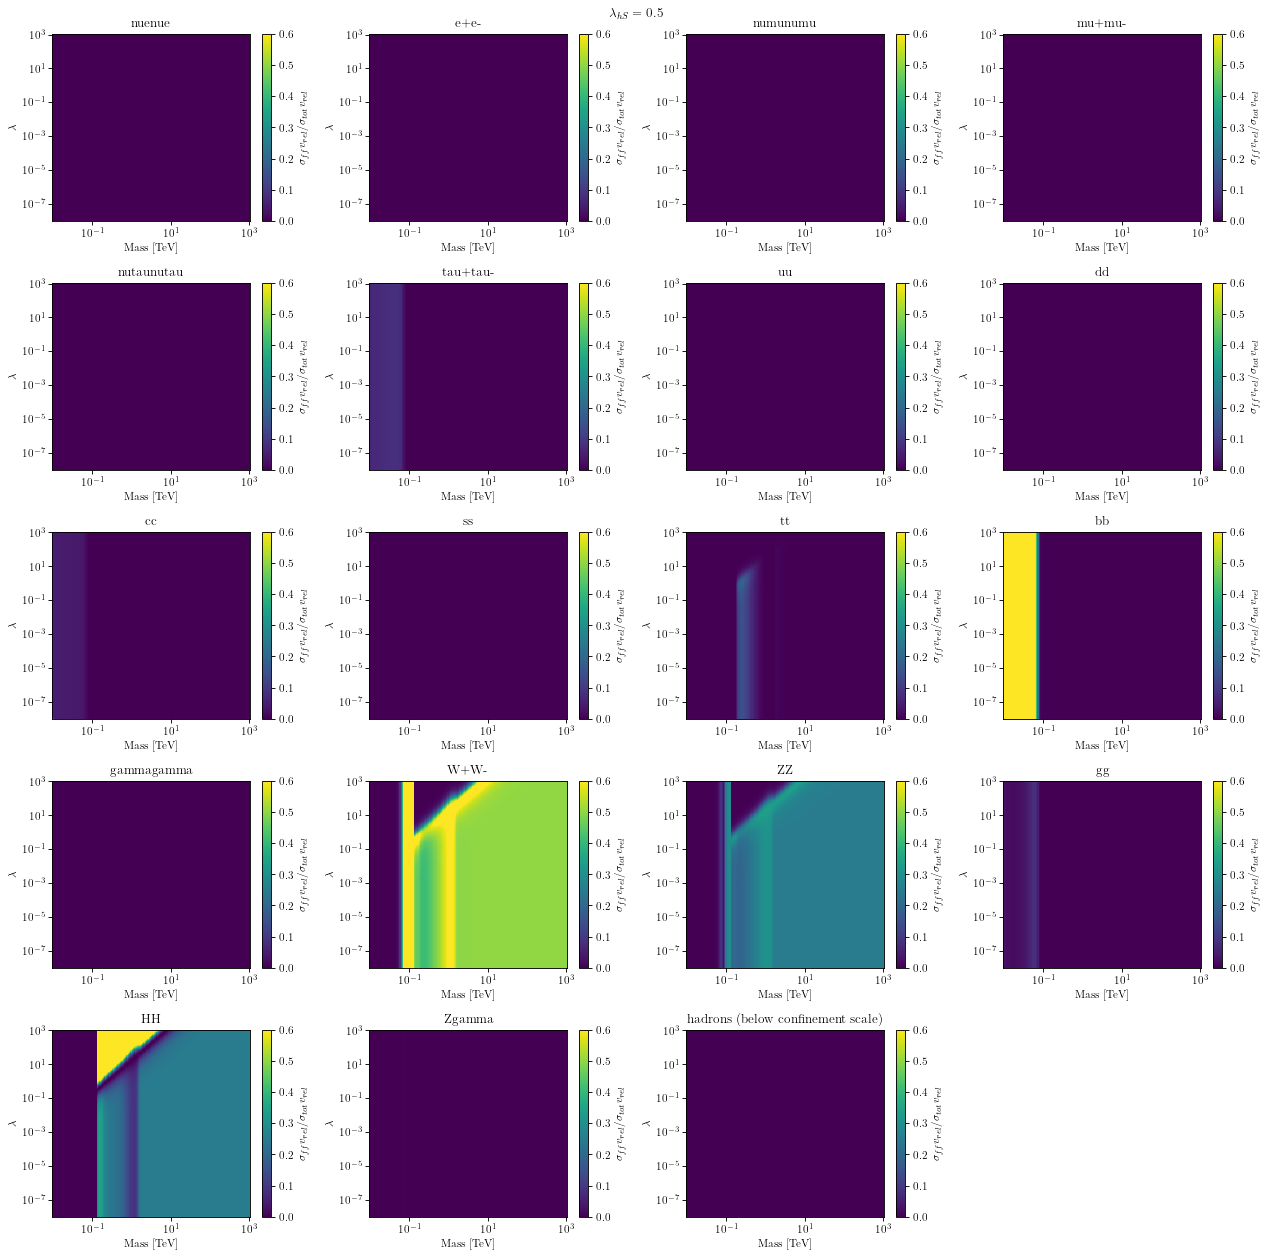

In [8]:
massvalues = np.unique(df.iloc[:,0])/1000 # Now they're in TeV
lambdavalues = np.unique(df.iloc[:,1])


plt.figure(figsize=(16,16), dpi=80)
plt.suptitle(r"$\lambda_{hS}=0.5$")
for idx, channel_name in enumerate(list(df.columns[2:])):
    plt.subplot(5,4, idx+1)
    plt.title(f"{channel_name}")
    plt.pcolormesh(massvalues, lambdavalues, 
                   (df[channel_name].to_numpy()/np.sum(df.iloc[:,2:].to_numpy(),axis=1)).reshape(lambdavalues.shape[0], massvalues.shape[0]), vmin=0, vmax=0.6)#,
                #    norm=LogNorm(vmin=1e-50))
    plt.xlabel('Mass [TeV]')
    plt.ylabel('$\lambda$')
    plt.loglog()
    plt.colorbar(label=r'$\sigma_{ff} v_{rel}/\sigma_{tot} v_{rel}$')
plt.tight_layout()
plt.show()

In [9]:
import sys
from gammapy.astro.darkmatter import (
    profiles,
    JFactory
)
from astropy import units as u
from astropy.coordinates import SkyCoord
from gammapy.maps import Map, MapAxis, MapAxes, WcsGeom

sys.path.append("../gammabayes")

from utils.utils import log10eaxistrue, longitudeaxistrue, latitudeaxistrue, aefffull, aeff_efficient
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0], channel_params[:,1]),splitBFs[:,15])




profile = profiles.EinastoProfile()

# Adopt standard values used in HESS
profiles.DMProfile.DISTANCE_GC = 8.5 * u.kpc
profiles.DMProfile.LOCAL_DENSITY = 0.39 * u.Unit("GeV / cm3")

profile.scale_to_local_density()

position = SkyCoord(0.0, 0.0, frame="galactic", unit="deg")
geom = WcsGeom.create(skydir=position, 
                      binsz=longitudeaxistrue[1]-longitudeaxistrue[0],
                      width=(longitudeaxistrue[-1]-longitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0], latitudeaxistrue[-1]-latitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0]),
                      frame="galactic")


jfactory = JFactory(
    geom=geom, profile=profile, distance=profiles.DMProfile.DISTANCE_GC
)
jfact = jfactory.compute_differential_jfactor().to(u.TeV**2/(u.sr*u.cm**5)).value


partial_sigmav_interpolator_dictionary = {channel: interpolate.LinearNDInterpolator((channel_params[:,0]/1000, channel_params[:,1]),splitBFs[:,idx+2]) for idx, channel in enumerate(list(variablesdict.values())[2:])}
print(partial_sigmav_interpolator_dictionary)
jfactory.compute_differential_jfactor().unit



/Users/lpin0002/anaconda3/envs/testywesty/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'channel_params' is not defined

In [ ]:
from BFCalc.createspectragrids import singlechannel_diffflux

darkSUSY_to_Gammapy_converter = {
    "nuenue":"nu_e",
    "e+e-": "e",
    "numunumu":"nu_mu",
    "mu+mu-":"mu",
    'nutaunutau':"nu_tau",
    "tau+tau-":"tau",
    "cc": "c",
    "bb": "b",
    "tt": "t",
    "W+W-": "W",
    "ZZ": "Z",
    "gg": "g",
    "gammagamma": "gamma",
    "HH": "h",
}


    

In [ ]:
channelfuncdictionary = {}
modulefolderpath = '../gammabayes/BFCalc'
massvalues          = np.load(modulefolderpath+f"/griddata/massvals_massenergy_diffflux_grid.npy")/1e3
log10xvals        = np.load(modulefolderpath+f"/griddata/log10xvals_massenergy_diffflux_grid.npy")

for darkSUSYchannel in darkSUSYchannel_list:
    try:
        gammapychannel = darkSUSY_to_Gammapy_converter[darkSUSYchannel]
        tempspectragrid = np.load(modulefolderpath+f"/griddata/channel={gammapychannel}_massenergy_diffflux_grid.npy")
        channelfuncdictionary[darkSUSYchannel] = interpolate.RectBivariateSpline(np.log10(massvalues), log10xvals, np.array(tempspectragrid).T, 
                                    kind='linear', bounds_error=False, fill_value=1e-3000)
    except:
        channelfuncdictionary[darkSUSYchannel] = lambda logmass, log10x: log10x*0
    

In [ ]:

massvalues = np.logspace(-1, 2, 401)
sigfrac_test_values = np.logspace(-10, 1, 701)
testmassmesh, test_sigfrac_mesh = np.meshgrid(massvalues, sigfrac_test_values, indexing='ij')


In [ ]:
channel_test_names = list(partial_sigmav_interpolator_dictionary.keys())
from matplotlib.pyplot import get_cmap
from scipy import special

cmap = get_cmap('cool')
# partial_sigmav_interpolator_dictionary, channelfuncdictionary
massvalues_test = np.logspace(-0.8, 2, 3)
couplingvalues_test = np.logspace(-5,2,8)
energyvalues_test = np.logspace(-1,2,31)
# 
spectralvals = lambda massval, couplingval: np.exp(special.logsumexp([np.log(float(partial_sigmav_interpolator_dictionary[channel](massval, couplingval)))+np.log(np.squeeze(channelfuncdictionary['W+W-'](np.log10(massval), np.log10(energyvalues_test)-np.log10(massval)))) for channel in channel_test_names], axis=0))

lognormspectralvals = lambda massval, couplingval: special.logsumexp(np.log(spectralvals(massval,couplingval))+np.log(energyvalues_test))


NameError: name 'counter' is not defined

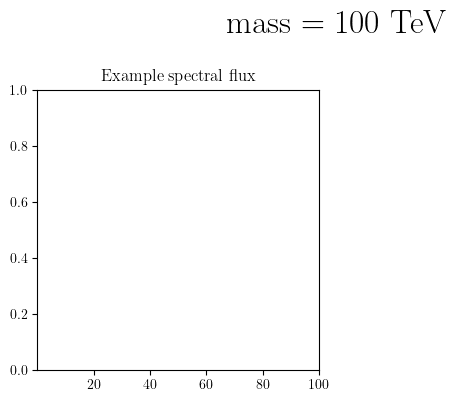

In [ ]:
testmass = 100



plt.figure(figsize=(8,8))


plt.suptitle(f"mass = {testmass} TeV", fontsize=24)



plt.subplot(2,2,1)
plt.title('Example spectral flux')

plt.xlim([energyvalues_test[0], energyvalues_test[-1]])


basespectra = spectralvals(testmass, couplingvalues_test[0])


plt.plot(energyvalues_test, 
            basespectra,
            color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingvalues_test[0]}")

plt.loglog()
plt.legend([r"$\lambda_{hS}=$"+f"{couplingval}" for couplingval in couplingvalues_test])
plt.legend()


plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$d\Phi_{ex}/dE$ [1/(cm$^2$ TeV)]')




plt.subplot(2,2,2)
plt.title(
r'''Difference between example 
    and other spectral fluxes
    for various coupling constant values''')



basespectra = spectralvals(testmass, couplingvalues_test[0])


for counter, couplingval in enumerate(couplingvalues_test[1:]):
    plt.xlim([energyvalues_test[0], energyvalues_test[-1]])
    plt.plot(energyvalues_test, 
            np.exp(np.log(spectralvals(testmass, couplingval)))-basespectra,
            color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingval}")
    
    
plt.legend()
plt.loglog()


plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$d\Phi_{ex}/dE-d\Phi/dE$ [1/(cm$^2$ TeV)]')




plt.subplot(2,2,3)


plt.title(r'Example \textbf{normalised} spectral flux')



plt.xlim([energyvalues_test[0], energyvalues_test[-1]])

basespectra = np.exp(np.log(spectralvals(testmass, couplingvalues_test[0])) - lognormspectralvals(testmass, couplingvalues_test[0]))


plt.plot(energyvalues_test, 
         basespectra,
         color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingvalues_test[0]}")

plt.loglog()
plt.legend([r"$\lambda_{hS}=$"+f"{couplingval}" for couplingval in couplingvalues_test])
plt.legend()
plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$\pi_{ex}(E|\lambda_{hS}=10^{-5})$')



plt.subplot(2,2,4)
plt.title(
r'''Difference between example \textbf{normalised} 
    and other spectral \textbf{normalised} fluxes
    for various coupling constant values''')



plt.xlim([energyvalues_test[0], energyvalues_test[-1]])

basespectra = np.exp(np.log(spectralvals(testmass, couplingvalues_test[0])) - lognormspectralvals(testmass, couplingvalues_test[0]))

for counter, couplingval in enumerate(couplingvalues_test[1:]):
    plt.plot(energyvalues_test, 
            np.exp(np.log(spectralvals(testmass, couplingval))-lognormspectralvals(testmass, couplingval))-basespectra,
            color=cmap(counter/couplingvalues_test.shape[0]), label=r"$m_\chi=$"+f"{testmass}, "+r"$\lambda_{hS}=$"+f"{couplingval}")
plt.xscale('log')
plt.legend()
plt.xlabel('Gamma-Ray Energy [TeV]')
plt.ylabel(r'$\pi_{ex}(E|\lambda_{hS}=10^{-5})-\pi(E|\lambda_{hS})$')





plt.tight_layout()
plt.show()

In [ ]:
lognormspectralvals(1.0, couplingval)

-51.05725775186632

In [ ]:

darkSUSY_BFs_cleaned = pd.read_csv('BFCalc/darkSUSY_BFs/darkSUSY_BFs_cleaned.csv', delimiter=' ')

darkSUSY_massvalues = darkSUSY_BFs_cleaned.iloc[:,1]/1e3

darkSUSY_lambdavalues = darkSUSY_BFs_cleaned.iloc[:,2]

channelfuncdictionary = {}


log10xvals = np.load(modulefolderpath+f"/griddata/log10xvals_massenergy_diffflux_grid.npy")
massvalues = np.load(modulefolderpath+f"/griddata/massvals_massenergy_diffflux_grid.npy")

for darkSUSYchannel in list(darkSUSY_to_Gammapy_converter.keys()):
    try:
        gammapychannel = darkSUSY_to_Gammapy_converter[darkSUSYchannel]
        
        tempspectragrid = np.load(modulefolderpath+f"/griddata/channel={gammapychannel}_massenergy_diffflux_grid.npy")
        
        channelfuncdictionary[darkSUSYchannel] = interpolate.interp2d(np.log10(massvalues/1e3), log10xvals, np.array(tempspectragrid).T, 
                                    kind='linear', bounds_error=False, fill_value=1e-3000)
    except:
        channelfuncdictionary[darkSUSYchannel] = lambda logmass, log10x: log10x*0


partial_sigmav_interpolator_dictionary = {channel: interpolate.LinearNDInterpolator((darkSUSY_massvalues, darkSUSY_lambdavalues),darkSUSY_BFs_cleaned.iloc[:,idx+3]) for idx, channel in enumerate(list(darkSUSY_to_Gammapy_converter.keys()))}



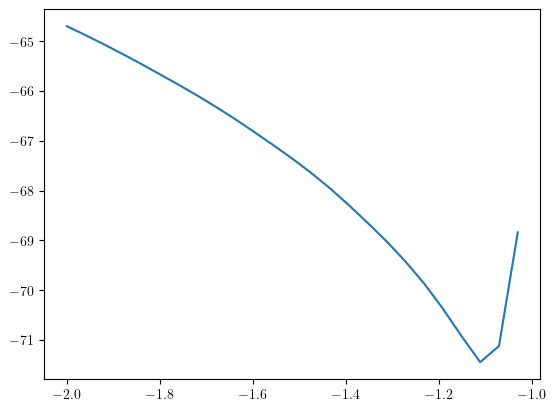

In [ ]:
massval = 0.1

plt.figure()
plt.plot(np.linspace(-2,2,100), special.logsumexp([np.log(float(partial_sigmav_interpolator_dictionary[channel](massval, 0.1)))+np.log(channelfuncdictionary[channel](np.log10(massval), np.linspace(-2,2,100)-np.log10(massval))) for channel in darkSUSY_to_Gammapy_converter.keys()], axis=0))
plt.show()


In [ ]:
float(partial_sigmav_interpolator_dictionary['W+W-'](1.0, 0.1))


5.12011189319232e-38

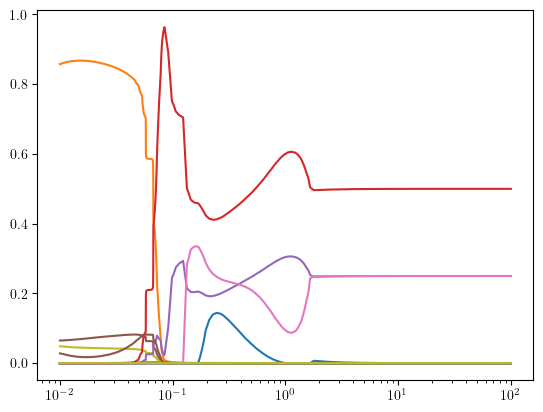

In [ ]:
logmassvalues = np.logspace(-2,2,3201)



partialvalues = []
for channel, partialfunc in partial_sigmav_interpolator_dictionary.items():
    partialvalues.append(partialfunc(logmassvalues, 0.01))

partialvalues = np.sum(partialvalues, axis=0)

plt.figure()
for channel, partialfunc in partial_sigmav_interpolator_dictionary.items():



    plt.plot(logmassvalues, partialfunc(logmassvalues, 0.01)/partialvalues)

plt.xscale('log')
plt.show()

In [15]:
darkSUSY_BFs_cleaned = pd.read_csv('../gammabayes/BFCalc/darkSUSY_BFs/darkSUSY_BFs_cleaned.csv', delimiter=' ')

In [16]:
darkSUSY_BFs_cleaned.columns

Index(['mS [GeV]', 'lahS', 'nuenue', 'e+e-', 'numunumu', 'mu+mu-',
       'nutaunutau', 'tau+tau-', 'uu', 'dd', 'cc', 'ss', 'tt', 'bb',
       'gammagamma', 'W+W-', 'ZZ', 'gg', 'HH', 'Zgamma',
       'hadrons (below confinement scale)'],
      dtype='object')